In [3]:
import pandas as pd
import numpy as np
import calendar
import statistics
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
#opening info
dataset = pd.read_csv('datasetUber.csv')
dataset

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [11]:
dataset.shape

(1156, 7)

In [12]:
dataset.isna()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1151,False,False,False,False,False,False,False
1152,False,False,False,False,False,False,False
1153,False,False,False,False,False,False,False
1154,False,False,False,False,False,False,False


In [15]:
dataset.isnull().sum()    #most usera did not mention the purpose of their trip

START_DATE*      0
END_DATE*        1
CATEGORY*        1
START*           1
STOP*            1
MILES*           0
PURPOSE*       503
dtype: int64

In [17]:
dataset = dataset.dropna()
dataset

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
5,1/6/2016 17:15,1/6/2016 17:19,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain
...,...,...,...,...,...,...,...
1150,12/31/2016 1:07,12/31/2016 1:14,Business,Kar?chi,Kar?chi,0.7,Meeting
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site


In [20]:
dataset.dtypes
#convert it to an object

START_DATE*     object
END_DATE*       object
CATEGORY*       object
START*          object
STOP*           object
MILES*         float64
PURPOSE*        object
dtype: object

In [24]:
dataset['START_DATE*'] = pd.to_datetime(dataset['START_DATE*'], format="%m/%d/%Y %H:%M")
dataset['END_DATE*'] = pd.to_datetime(dataset['END_DATE*'], format="%m/%d/%Y %H:%M")

dataset.dtypes

START_DATE*    datetime64[ns]
END_DATE*      datetime64[ns]
CATEGORY*              object
START*                 object
STOP*                  object
MILES*                float64
PURPOSE*               object
dtype: object

In [29]:
hour = []
day = []
dayoftheweek = []
month = []
weekday = []

#adding data to the empty list we have created
for x in dataset['START_DATE*']:
    hour.append(x.hour)
    day.append(x.day)
    dayoftheweek.append(x.dayofweek)
    month.append(x.month)
    weekday.append(calendar.day_name[dayoftheweek[-1]])   #using calendar library

#creating 5 columns to the table
dataset['Hour'] = hour
dataset['Day'] = day
dataset['Day of the Week'] = dayoftheweek
dataset['Month'] = month
dataset['Weekday'] = weekday
dataset.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,Hour,Day,Day of the Week,Month,Weekday
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,1,4,1,Friday
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,2,5,1,Saturday
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,5,1,1,Tuesday
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,6,2,1,Wednesday
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,17,6,2,1,Wednesday


<AxesSubplot:xlabel='CATEGORY*', ylabel='count'>

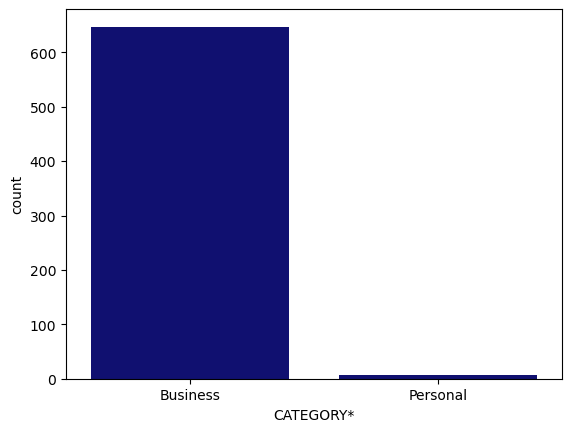

In [36]:
dataset['CATEGORY*'].value_counts() #number of taxi categories used
sns.countplot(x='CATEGORY*', data = dataset, color = 'navy')

Text(0.5, 1.0, 'How many miles are people usually in the trip?')

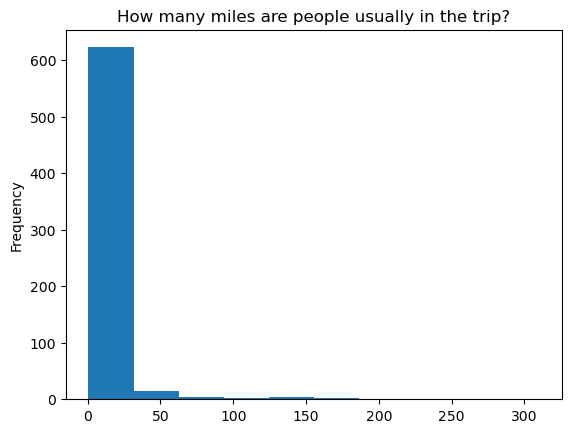

In [48]:
#duration of trips
dataset['MILES*'].plot.hist()
plt.title('How many miles are people usually in the trip?')

Text(0.5, 1.0, 'When do people use Uber? Hours-based')

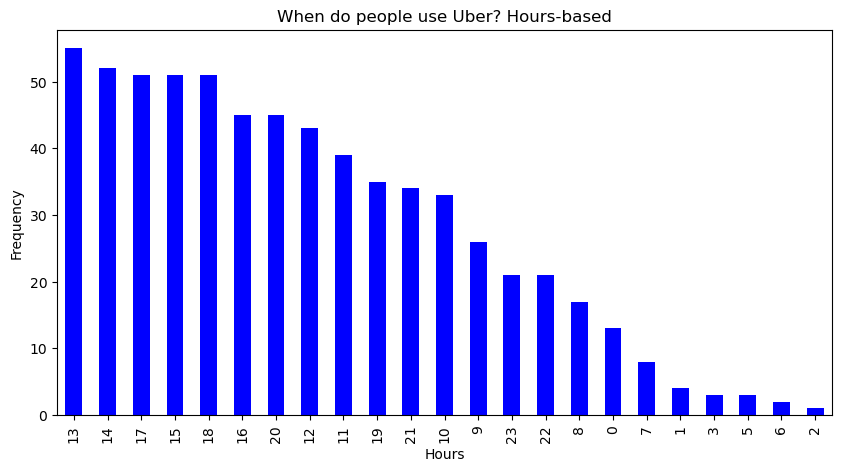

In [44]:
#hourly analysis
hours = dataset['START_DATE*'].dt.hour.value_counts()
hours.plot( kind = 'bar', color = 'blue', figsize=(10,5))

plt.xlabel('Hours')
plt.ylabel('Frequency')
plt.title('When do people use Uber? Hours-based')

#most likely afternoon

Text(0.5, 1.0, 'For what reasons do people usually take Uber?')

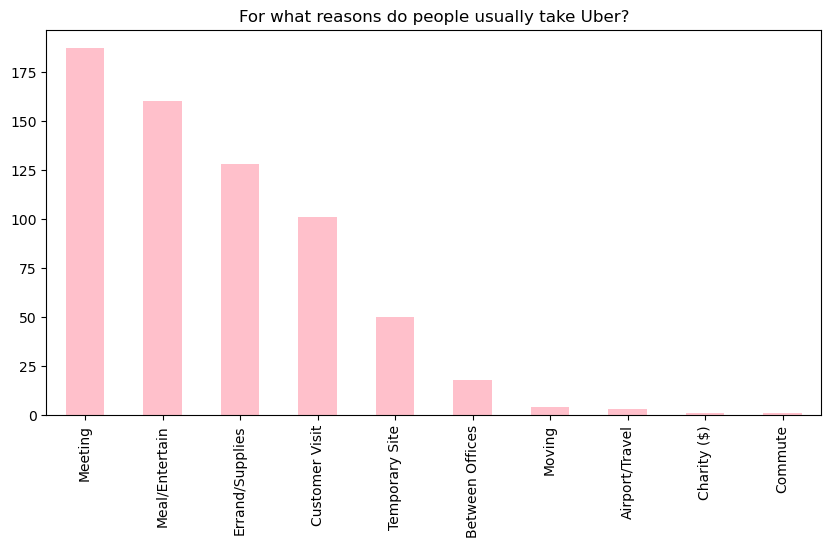

In [47]:
#purpose of the trips
purposes = dataset['PURPOSE*'].value_counts()
purposes.plot( kind = 'bar', color = 'pink', figsize=(10,5))
plt.title('For what reasons do people usually take Uber?')

Text(0.5, 1.0, 'What day of the week do people mostly take Uber?')

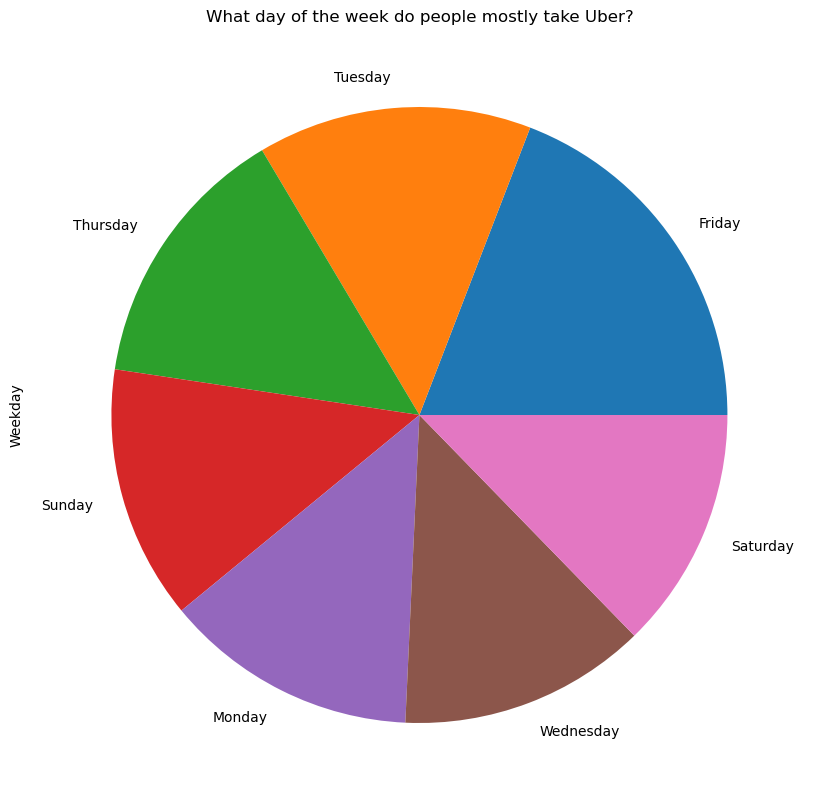

In [57]:
#daily analysis
weekDay = dataset['Weekday'].value_counts()
weekDay.plot(kind = 'pie', figsize= [10,10])
plt.title('What day of the week do people mostly take Uber?')

#almost equally although Fridays can expect a higher demand for taxi

Text(0.5, 1.0, 'The number of trips per each month')

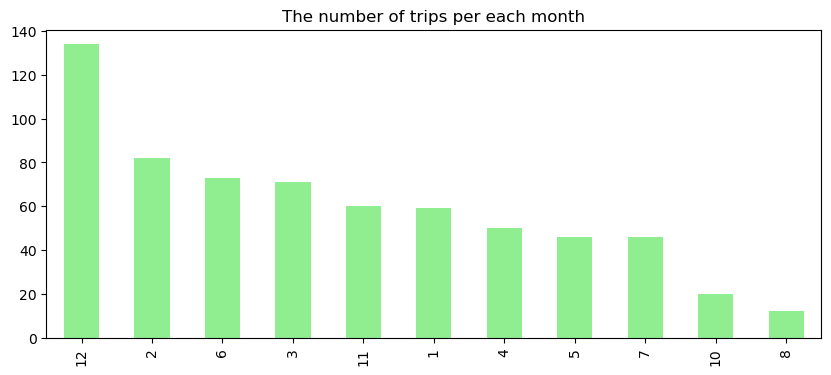

In [63]:
dataset['Month'].value_counts().plot(kind='bar',figsize=(10,4),color='lightgreen')
plt.title ('The number of trips per each month')

#december has the highest demand

Text(0.5, 1.0, 'The most common destination of Uber users')

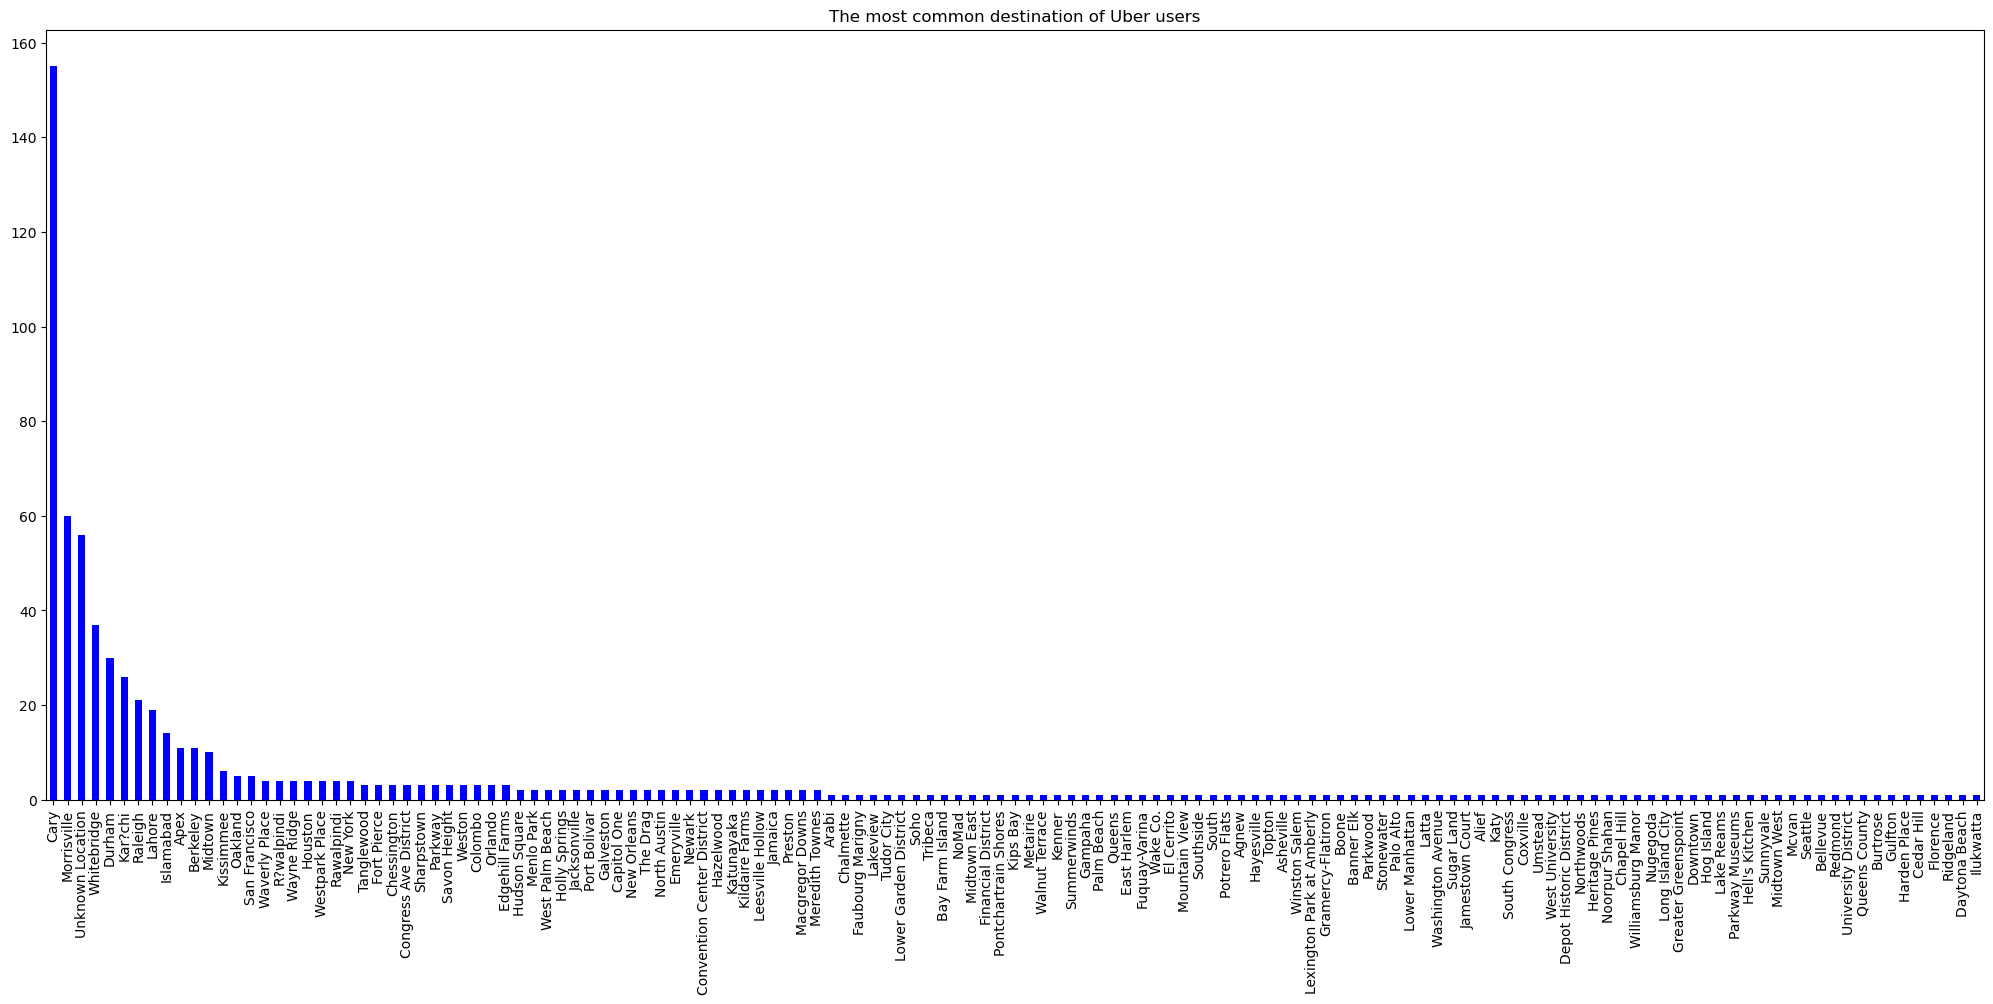

In [65]:
dataset['STOP*'].value_counts().plot(kind='bar',figsize=(25,10),color='blue')
plt.title('The most common destination of Uber users')